,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN



Categorical columns encoded successfully!


Model Evaluation:
MAE  : 979679.6912959901
MSE  : 1771751116594.0352
RMSE : 1331071.4167895108
R²   : 0.6494754192267803


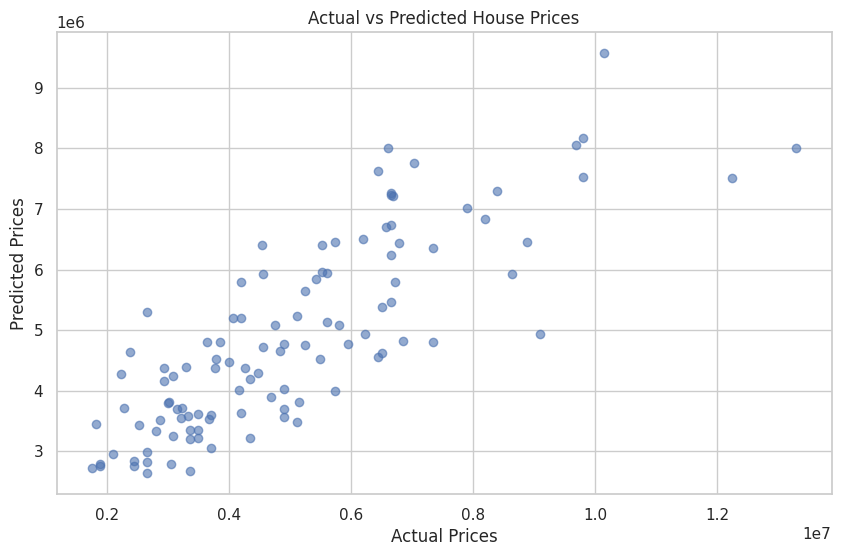


Coefficient Values:


,Coefficient
area,2.358488e+02
bedrooms,7.857449e+04
bathrooms,1.097117e+06
stories,4.062232e+05
mainroad,3.668242e+05
guestroom,2.331468e+05
basement,3.931598e+05
hotwaterheating,6.878813e+05
airconditioning,7.855506e+05
parking,2.257565e+05



Intercept: 293083.06915066857

Task 3 Completed Successfully!


In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load Dataset
df = pd.read_csv("data/Housing.csv")

display(df.head())
print(df.info())
display(df.describe(include='all'))

# 3. Encode Categorical Data
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nCategorical columns encoded successfully!\n")

# 4. Feature Selection
X = df.drop(columns=['price'])   # all columns except target
y = df['price']                  # target variable

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 6. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# -----------------------------------------------------------
# 8. Evaluation Metrics
# -----------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE  : {mae}")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")

# 9. Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# 10. Regression Coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficient Values:")
display(coef_df)

print("\nIntercept:", model.intercept_)

print("\nTask 3 Completed Successfully!")
